In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/lab3.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.model_selection import train_test_split

# Creating similar size samples of ham and spam
ham = df[df['Category'] == 'ham']
spam = df[df['Category'] == 'spam']
ham = ham.sample(spam.shape[0])

# Now combine these to form a dataset
dataset = pd.concat([ham, spam], ignore_index=True)

# Split for training and testing 
X_train, X_test, y_train, y_test = train_test_split(dataset['Message'], dataset['Category'], test_size=0.3)

# Convert to numeric vector format for model
# Integer feature counts work better than fractional counts like tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
ctvector = TfidfVectorizer()
X_train = ctvector.fit_transform(X_train).toarray()
X_test = ctvector.transform(X_test).toarray()

In [13]:
# A1 
# K-means clustering with k = 3 and k = 5
# Silhoette score is a metric used to evaluate how good clustering results are  
# in data clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans(n, flag = False):
    # Training model and fitting training data
    model = KMeans(n_clusters=n, random_state=0, n_init="auto")
    model.fit(X_train)

    # Predicting labels for test data
    labels = model.predict(X_test)

    if flag == True:
        # Testing accuracy of clustering model
        silhouette_avg = silhouette_score(X_test, labels)
    return {"cluster":n, "accuracy_score":silhouette_avg} if flag == True else None


# Number of clusters
num_of_clusters = 3
print(kmeans(3, True))
print(kmeans(5, True))

{'cluster': 3, 'accuracy_score': 0.009190052791939811}
{'cluster': 5, 'accuracy_score': 0.007659559505325167}


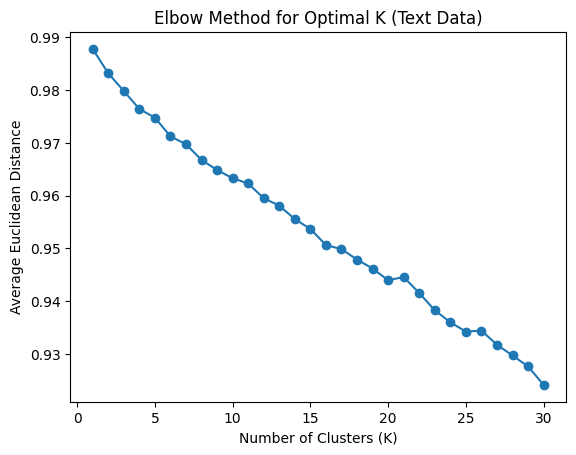

In [14]:
# A2 
# Determine the k-value for your dataset; k = {1, 31}
# Use elbow method to determine the ideal value of k based on average Euclidean
# distance from cluster center
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Specify the range of k values to try
k_values = range(1, 31)

# Fit k-means for each k and calculate the average Euclidean distance
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# Plot the elbow curve
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method for Optimal K (Text Data)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Euclidean Distance')
plt.show()
# As we can see, elbow method is not as intuitive for high dimensional textual
# data as it is for lower dimensional numeric data. This means we may not get
# a clear elbow as shown in figure below. Better metrics such as silhouette score
# are more applicable in this case as seen previously.

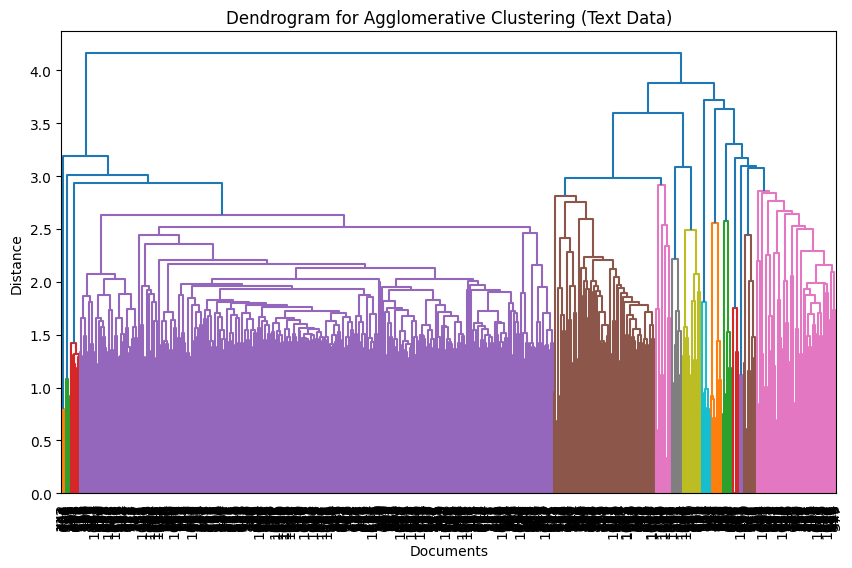

In [15]:
# A3 
# Use agglomerative clustering and plot dendogram to visualize the clusters
# Dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate pairwise distances for hierarchical clustering
distances = np.array(X_train)
linkage_matrix = linkage(distances, method='ward')  # You can try different linkage methods

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,  orientation='top', leaf_font_size=10)
plt.title('Dendrogram for Agglomerative Clustering (Text Data)')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()

In [16]:
# Agglo,erative clustering
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering
num_clusters = 3  # You can choose the number of clusters
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_test)

silhouette_avg = silhouette_score(X_test, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.010267645663008959


In [20]:
# A4 
# Sequential feature selection


In [ ]:
# A5
# Principal Component Analysis
from sklearn.decomposition import PCA